In [1]:
# Import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt

In [2]:
# Load data
data = pd.read_csv('train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [3]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.

In [13]:
X_train.shape

(784, 41000)

In [7]:
def params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z))  # For numerical stability
    return expZ / expZ.sum(axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def create(Y):
    # Use int() to ensure we are working with integer indices
    column_Y = np.zeros((Y.size, int(Y.max()) + 1))  # Y.max() is cast to int
    column_Y[np.arange(Y.size), Y.astype(int)] = 1  # Convert Y to int for indexing
    return column_Y.T

def cross_entropy_loss(A2, Y):
    m = Y.size  # Change this to Y.size
    create_Y = create(Y)
    loss = -np.sum(create_Y * np.log(A2 + 1e-12)) / m  # Add epsilon for stability
    return loss

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    create_Y = create(Y)
    dZ2 = A2 - create_Y
    m = Y.size # Number of examples
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return (np.sum(predictions == Y) / Y.size) * 100

In [8]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = params()
    print(f"{'Iteration':^12} | {'Accuracy':^12} | {'Loss':^12}")
    print("-" * 45)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        loss = cross_entropy_loss(A2, Y)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            accuracy = get_accuracy(get_predictions(A2), Y)
            print(f"{i:^12} | {accuracy:^12.2f} | {loss:^12.4f}")

    return W1, b1, W2, b2

In [10]:
# Gradient descent
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 300, 0.1)

 Iteration   |   Accuracy   |     Loss    
---------------------------------------------
     0       |    14.36     |    3.8526   
     10      |    25.53     |    2.1713   
     20      |    36.95     |    1.8818   
     30      |    44.21     |    1.6768   
     40      |    50.01     |    1.5079   
     50      |    54.53     |    1.3702   
     60      |    58.32     |    1.2586   
     70      |    61.42     |    1.1670   
     80      |    64.12     |    1.0913   
     90      |    66.11     |    1.0282   
    100      |    67.89     |    0.9753   
    110      |    69.39     |    0.9307   
    120      |    70.60     |    0.8927   
    130      |    71.76     |    0.8599   
    140      |    72.78     |    0.8312   
    150      |    73.60     |    0.8057   
    160      |    74.32     |    0.7830   
    170      |    74.97     |    0.7625   
    180      |    75.71     |    0.7438   
    190      |    76.31     |    0.7267   
    200      |    76.87     |    0.7108   
    210 

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


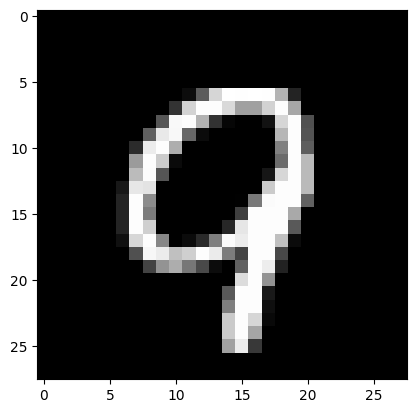

Prediction:  [8]
Label:  8


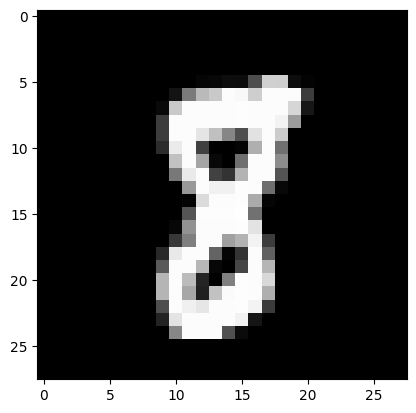

Prediction:  [4]
Label:  4


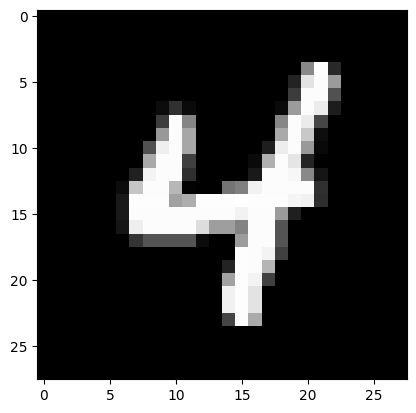

Prediction:  [0]
Label:  0


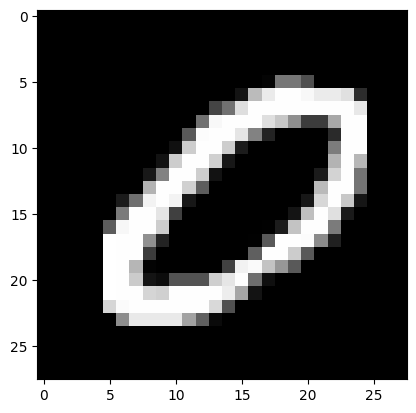

Accuracy:  80.30000000000001 %


In [12]:
# Test some predictions
for i in range(4):
    test_prediction(i, W1, b1, W2, b2)

# Calculate accuracy on the development set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Accuracy: ", get_accuracy(dev_predictions, Y_dev), "%")